# Mall Customer Segmentation
    - goal is to know which one is our best customer profile & focus attract those people AND find out why are they interested to us
    - https://www.kaggle.com/sonerkar/customer-segmentation-eda-clustering-kmeans

# Obtain

In [196]:
# remove unecessary warnings
import warnings
import os
warnings.filterwarnings("ignore")

import pandas as pd

# load main data
df = pd.read_csv("/Users/dwihadyan/Downloads/theleadio/ds-exploration/p5/data/Mall_Customers.csv")


since we are doing k-means clustering, it is completely fine to assign each category to numerical direcly. (doing this approach in supervise learning will result us allocating some provinces more important than other unintentionally. eg. java : 3, kalimantan : 1, means we saying java is 3x more significant than kalimantan)

let, for province:
- java : 1
- kalimantan : 2
- sulawesi : 3
- papua : 4
- sulawesi : 5

industry :
- IT : 1
- finance : 2
- real estate : 3
- education : 4
- government : 5

how_you_find_us :
- instagram ads : 1
- fb ads : 2
- google ads : 3
- google search : 4
- friends : 5


In [197]:
import random
import numpy as np
np.random.seed(1)

df['provinces'] = np.random.randint(low=1,high=6,size=len(df))
df['industry'] = np.random.randint(low=1,high=6,size=len(df))
df['how_you_find_us'] = np.random.randint(low=1,high=6,size=len(df))

In [198]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),provinces,industry,how_you_find_us
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,2.97000,2.980000,3.035000
std,57.879185,13.969007,26.264721,25.823522,1.46966,1.431729,1.440189
min,1.000000,18.000000,15.000000,1.000000,1.00000,1.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000,2.00000,2.000000,2.000000
50%,100.500000,36.000000,61.500000,50.000000,3.00000,3.000000,3.000000
75%,150.250000,49.000000,78.000000,73.000000,4.00000,4.000000,4.000000
max,200.000000,70.000000,137.000000,99.000000,5.00000,5.000000,5.000000


# Scrub
    - ensure no null & all datatypes are integer (we'll do gender after 'Explore', as it easier to expore in this format)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   provinces               200 non-null    int64 
 6   industry                200 non-null    int64 
 7   how_you_find_us         200 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 12.6+ KB


# Explore
    - we have more male or female ? (countplot)
    - majority of age, income, spending score each w.r.t gender ? swarmplot
    - relationship between each other ? (regplot, heatmap for advanced)

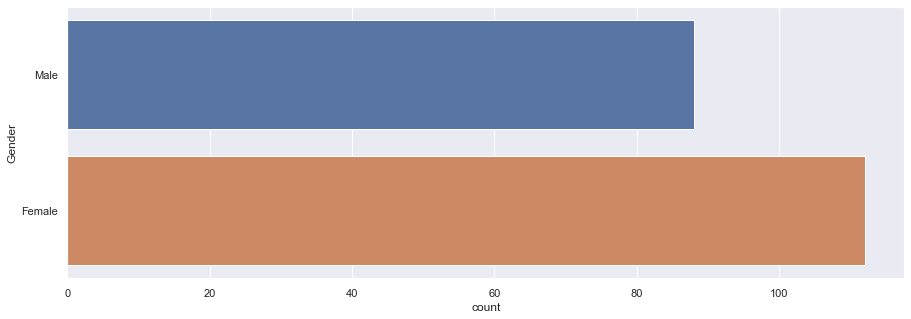

88
112


In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# gender count
plt.figure(1, figsize = (15,5))
bar_itself = sns.countplot(y="Gender", data = df)

plt.show()

print(bar_itself.patches[0].get_width())
print(bar_itself.patches[1].get_width())

# 112 (56%) are female, 88 (44%) are male 

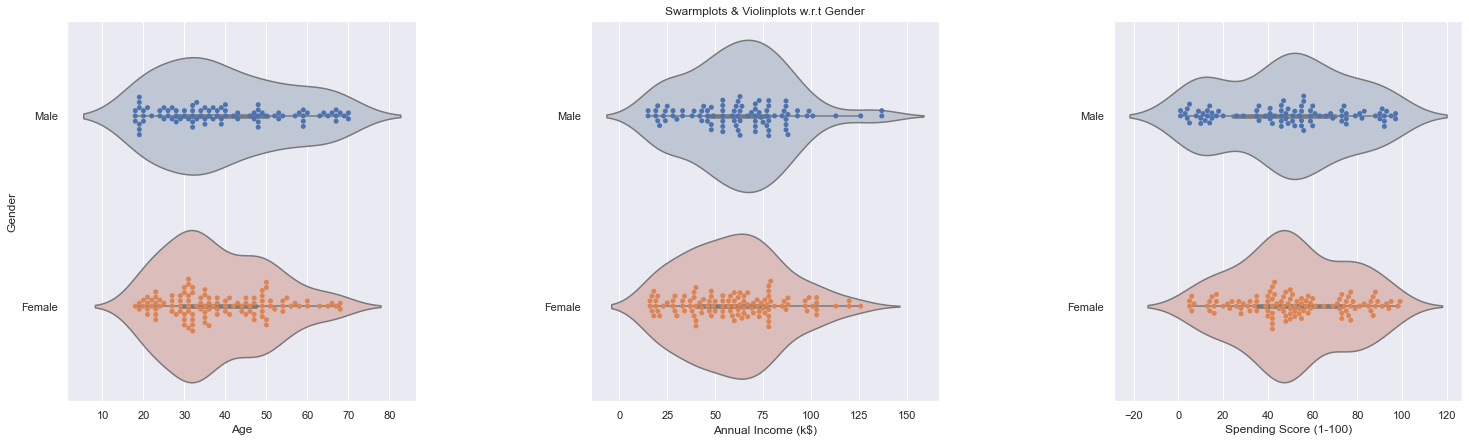

In [201]:
# majority of each age, income, spending

plt.figure(1, figsize=(25,7))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, y="Gender", data=df, palette = 'vlag')
    sns.swarmplot(x=cols, y="Gender", data=df)

    # set ylabel only on the most left, to make it tidy
    plt.ylabel('Gender' if n == 1 else '')

    # set title at middle of plot
    plt.title('Swarmplots & Violinplots w.r.t Gender' if n == 2 else '')
plt.show()

# majority for male, age 25-35, income 50-80, spending score 40-60
# majority for female, age 25-35, income 50-80, spending score 40-60
# both m & f can be seen that :
    # age reaches it peak at around 30, and decline slowly
    # income increase fast from 0 to 60, and 60 onwards decline even at faster exponential-like speed
# spending score behavior:
    # female increases consisteltly from 0 to 45, and decreases slower to the tail 100 
    # male had a good growth from 0 to 15, and stagnant from 15 to 30, and growth same speed again from 30 to 50, and gradual consistent decline from peak 50 to 100
# none of the factors (age, income, spendingscore) has linear relatioship as they increases (obvious for age, but not-so on income & spendingScore(maybe thet discover another better luxury mall ?))


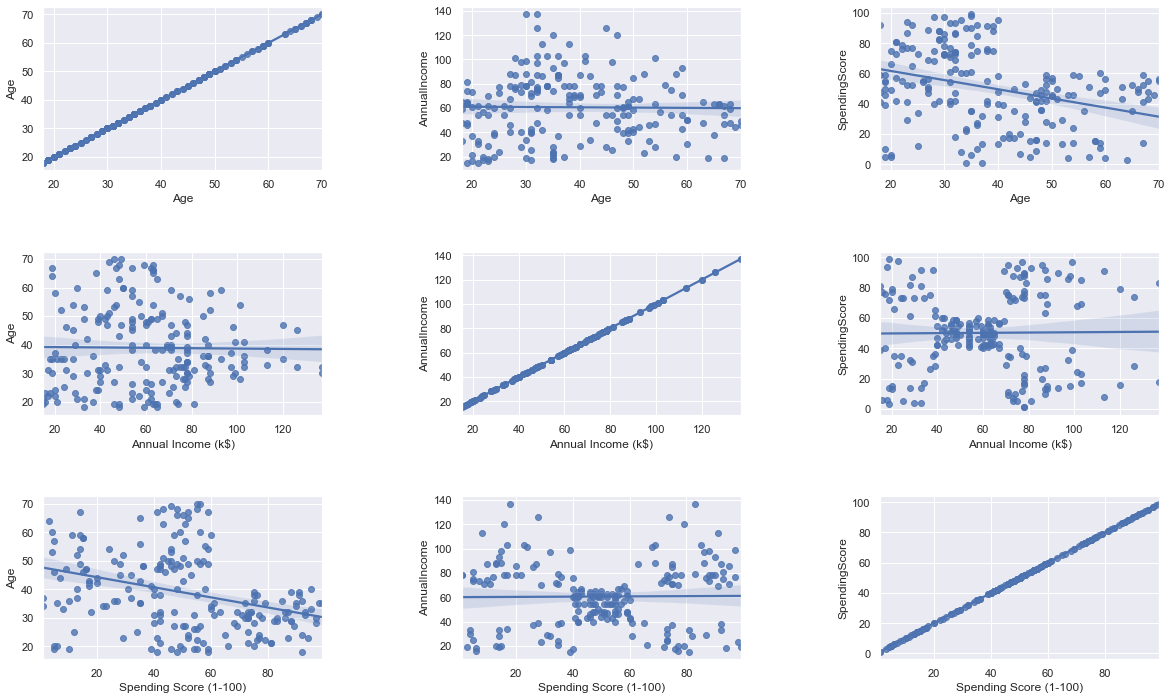

In [202]:
# relationship check using regression plot (heatmap once everyone comfortable)
plt.figure(1, figsize=(20,12))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1

        # plot 3 x 3 size
        plt.subplot(3,3,n)

        # spacing for each plot for readability
        plt.subplots_adjust(hspace=0.5, wspace=0.5)

        sns.regplot(x=x, y=y, data=df)

        # to make it tidy, take the first two word of each ylabel name. (eg : ylabel 'Annual Income (k$)', we only take 'Annual Income')
        plt.ylabel(y.split()[0]+''+y.split()[1] if len(y.split()) > 1 else y)


# none of the data between has any relationships between age, income, spending
# age & spendingscore has some weak relationship (older they get, lessen their spendingscore become)
# income & spendingscore have interesting relationship that spendingScores stays at 50 during 40-60 income, and no relationship at all at before 40 & after 60 income


<AxesSubplot:>

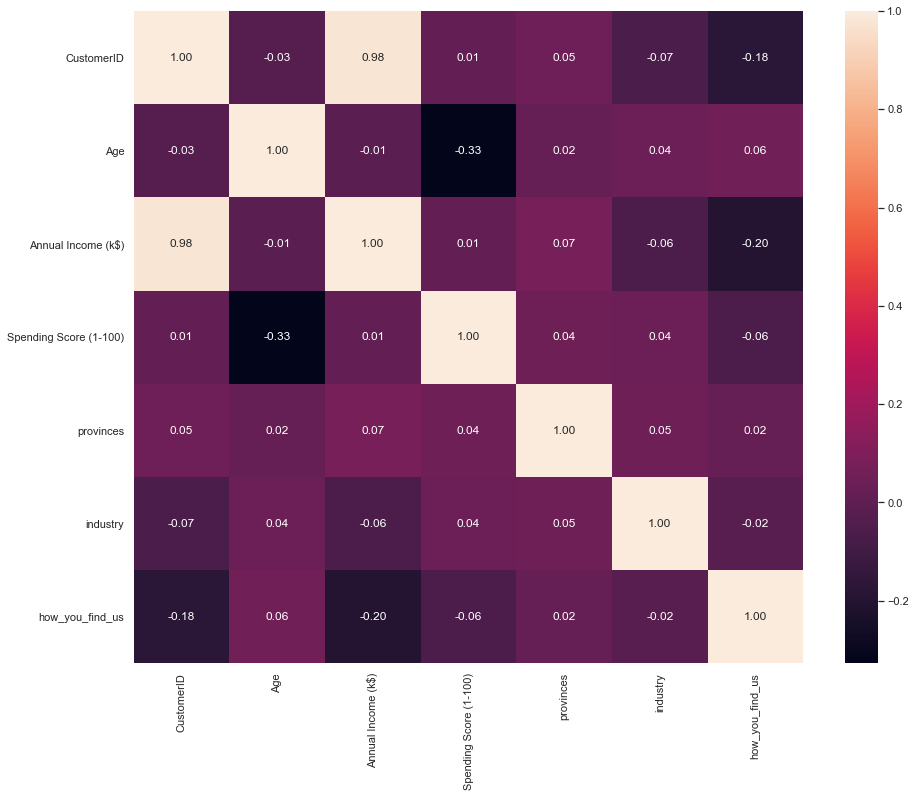

In [203]:
# heatmap just to see look & feel of all data

corr_matrix = df.corr()

sns.set(font_scale = 1)
plt.subplots(figsize=(15,12))
sns.heatmap(corr_matrix, annot= True, fmt = ".2f")

# Model

In [204]:
# plot shows n equally distributed (in size) groups
# since its in equal size, we shoud focus on the plot that is most dense w.r.t the area 
    

In [205]:
# kmeans on age & spending

from sklearn.cluster import KMeans

# get all values in age & spending column
X1 = df[['Age', 'Spending Score (1-100)']].iloc[:,:].values

# inertia : tells us how far away the points within cluster are. lower the value, the better the grouping. we stop when we achieve the 'elbow' (inertia drop almost vertical, and starts to slowly become horizontal (L like elbow shape (hahahelpmehaha)))
inertia = []

# run loop to find best no-of-clusters, and we want to have max 11 clusters only. read here on klearn parameters https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
for i in range(1,11):

    # setup kmeans with parameter we want
    algorithm = (
        KMeans(
            n_clusters=i,
            n_init=10,
            max_iter=300,
            tol=0.0001,
            random_state=111,
            algorithm='elkan'
        )
    )

    # fit data into kmeans to get best cluster
    algorithm.fit(X1)

    # record inertia to be plotted
    inertia.append(algorithm.inertia_)


# plot inertia vs no-of-clusters, to see where the 'elbow' happen and take that as our best no-of-clusters

    

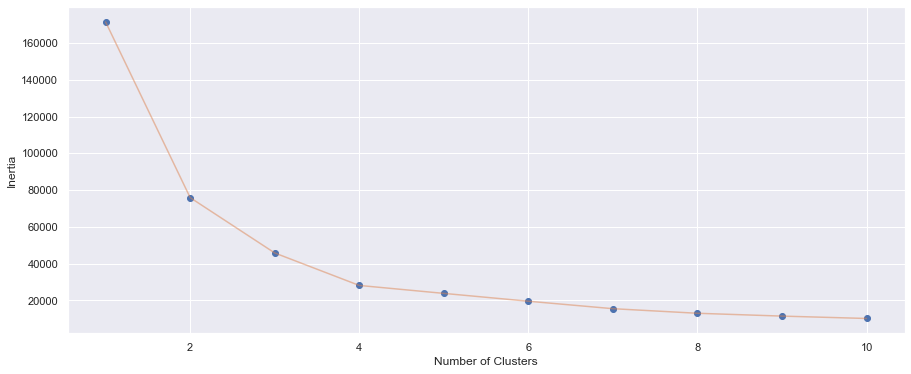

In [206]:
plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

# after 4 clusters, the decrease arent much anymore, hence we take 4

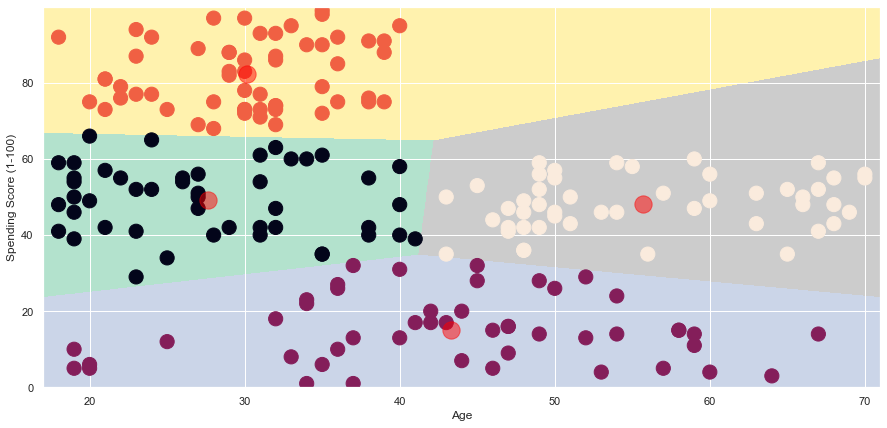

In [207]:
# run kmeans with 4 clusters only
algorithm = (
    KMeans(
        n_clusters=4,
        n_init=10,
        max_iter=300,
        tol=0.0001,
        random_state=111,
        algorithm='elkan'
    )
)

# fit data into kmeans to get best cluster
algorithm.fit(X1)

# area of clusters
labels1 = algorithm.labels_

# center of the cluster
centroids1 = algorithm.cluster_centers_

# combine data & cluster info into one
h = 0.02
x_min, x_max = X1[:,0].min() - 1, X1[:,0].max() + 1
y_min, y_max = X1[:,1].min() - 1, X1[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

# plot cluster area & centroid in data
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()


# age & spending : age 15 - 40, spending 30-65
# you may discover better by looking other combo (2 options out of age, spending, income)
# now we get to the point and jump to finale, compare all 3 & recommend to management which group we should focus first

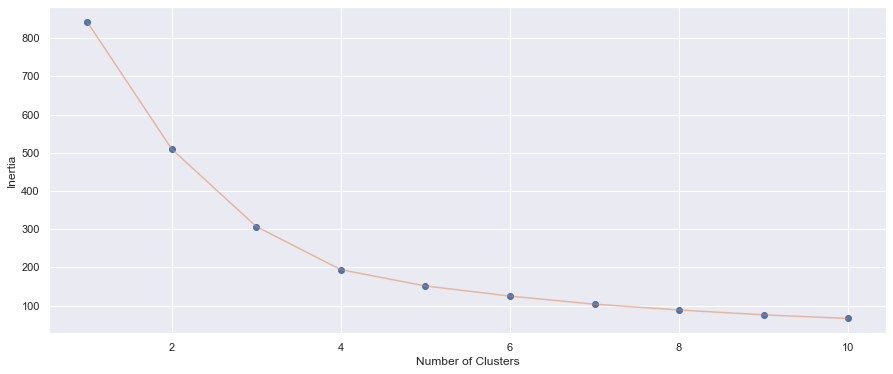

In [208]:
# find best cluster between provinces & how_you_find_us
X2 = df[['provinces' , 'how_you_find_us']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

# plot 'learning curve'
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

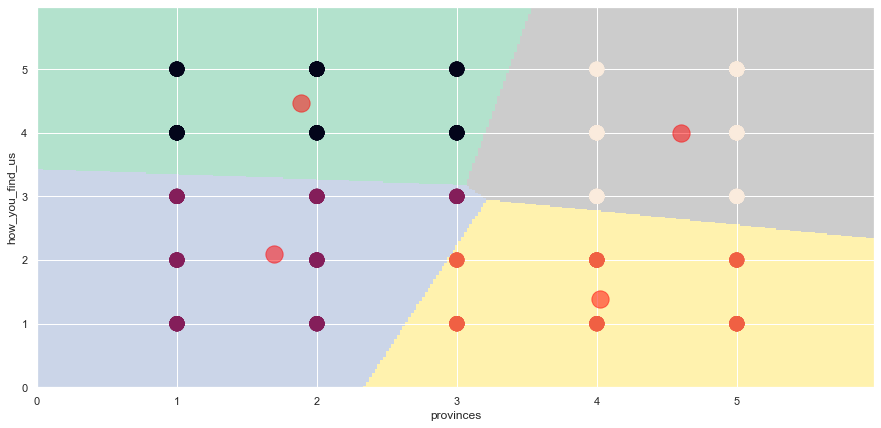

In [209]:
# elbow happens at 4, plot kmeans with k=4
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

# combine data & cluster info into one
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

# plot cluster area & centroid in data
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'provinces' ,y = 'how_you_find_us' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('how_you_find_us') , plt.xlabel('provinces')
plt.show()



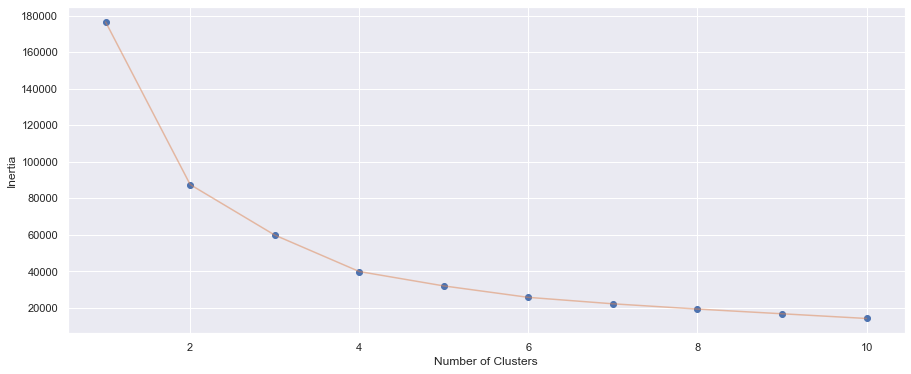

In [210]:
# find best clusters with 3 features 
X3 = df[['Age' , 'Annual Income (k$)' ,'provinces']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

# plot "learning curve"
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()



In [211]:
# pick 6, as 6 onwards, it reach lowest y axis (50000) and decrease are slow after 6

# get 6 clusters that best represent the group
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_


# plot result in 3d graph
import plotly as py
import plotly.graph_objs as go



df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['provinces'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'provinces'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [212]:
k0 = []
k1 = []
k2 = []
k3 = []

for i in labels3:
    if i == 0:
        k0.append(i)
    elif i == 1:
        k1.append(i)
    elif i == 2:
        k2.append(i)
    elif i == 3:
        k3.append(i)       

In [213]:
print(len(k0))
print(len(k1))
print(len(k2))
print(len(k3))


73
54
24
49


In [214]:
# age, annual income , province
target_market = df[df['label3'] == 0]
target_market[['Age', 'Annual Income (k$)', 'provinces']].describe()

,Age,Annual Income (k$),provinces
count,73.000000,73.000000,73.000000
mean,31.958904,72.958904,2.904110
std,8.678579,9.366664,1.444957
min,18.000000,54.000000,1.000000
25%,26.000000,65.000000,2.000000
50%,32.000000,74.000000,3.000000
75%,38.000000,78.000000,4.000000
max,56.000000,88.000000,5.000000


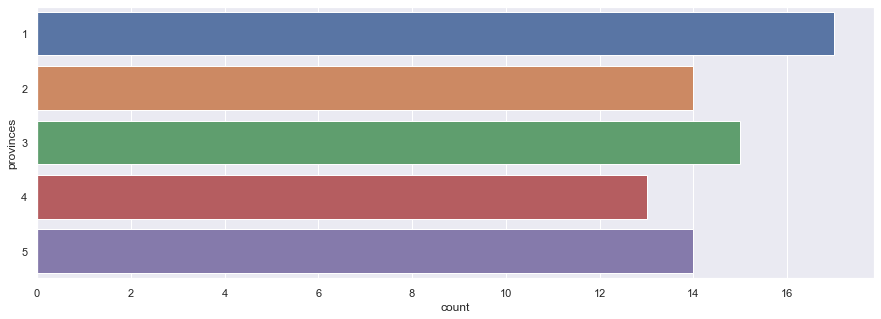

In [215]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'provinces' , data = target_market)
plt.show()

# iNterpret

- from swarm & violinplot (in explore) :
    - majority for male, age 25-35, income 50-80, spending score 40-60
    - majority for female, age 25-35, income 50-80, spending score 40-60
    - both m & f can be seen that :
        - age reaches it peak at around 30, and decline slowly
        - income increase fast from 0 to 60, and 60 onwards decline even at faster exponential-like speed
    - spending score behavior:
        - female increases consisteltly from 0 to 45, and decreases slower to the tail 100 
        - male had a good growth from 0 to 15, and stagnant from 15 to 30, and growth same speed again from 30 to 50, and gradual consistent decline from peak 50 to 100

- from 2d plot age vs spendingScore (in model) :
    - age & spending : age 15 - 40, spending 30-65
    - you may discover better by looking other combo (2 options out of age, spending, income)
    - now we get to the point and jump to finale, compare all 3 & recommend to management which group we should focus first

- from 3d plot age vs income vs province (in model) :
    - focus on age between 18-56, income between 54-88, province 1 & 3 (java and sulawesi)

- how to improve
    - think of another dataset that can bring impact to this (city they come from, occupation, etc).
    - in 'explore' section, use different charts to try find out which are the 3 columns you think that it will be most useful ?
    - data science its just a tool, what matter most is your domain knowledge towards your business. with that, you will know the right question to ask, and get the right data to get to get best result
    - k thx bye